<a href="https://colab.research.google.com/github/Jeonsec/LG_Innotek_Hackathon/blob/main/dacon_lg_HHJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/lg_dacon

/content/gdrive/MyDrive/Colab Notebooks/lg_dacon


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.tail()

## X feature : 56

## Y feature : 14

col 4, 23, 47, 48은 통과여부

In [ ]:
useless_col = ['X_04','X_10', 'X_11', 'X_23', 'X_34', 'X_35', 'X_36', 'X_37', 'X_47', 'X_48']
train = train.drop(useless_col, axis=1)
test = test.drop(useless_col, axis=1)

## Feature engineering

NEW FEATURE 도입(by intuition)

57. X3/X7
58. X3/X5
59. (X19+X21) - (X20+X22)
60. (X24+X26+28) - (X25+X27+X29)
61. X_19+X_30
62. X_20+X_31
63. X_21+X_32
64. X_22+X_33
65. abs((X41+X43) - (X42+X44))
66. X3/(X19+X20+X21+X22)
67. row_idx
68. X_14~X_18의 유사도(1/variance)
69. X61~64의 유사도(1/variance)

In [ ]:
# train, test data X, Y seperation
x_cand = []
y_cand = []

for col in train.columns:
    if 'X' in col:
        x_cand.append(col)
    elif 'Y' in col:
        y_cand.append(col)

x_train = train[x_cand]
y_train = train[y_cand]
x_test = test[x_cand]

In [ ]:
x_train_fe = x_train.copy()
x_test_fe = x_test.copy()

x_train_log = x_train.copy()
x_test_log = x_test.copy()

X_57


In [ ]:
# train data new feature 추가
x_train_fe[x_train_fe.columns[-1][:-2] + str(int(x_train_fe.columns[-1][-2:])+1)] = x_train_fe['X_03']/x_train_fe['X_07']
x_train_fe[x_train_fe.columns[-1][:-2] + str(int(x_train_fe.columns[-1][-2:])+1)] = x_train_fe['X_03']/x_train_fe['X_05']
x_train_fe[x_train_fe.columns[-1][:-2] + str(int(x_train_fe.columns[-1][-2:])+1)] = (x_train_fe['X_19']+x_train_fe['X_21']) - (x_train_fe['X_20']+x_train_fe['X_22'])
x_train_fe[x_train_fe.columns[-1][:-2] + str(int(x_train_fe.columns[-1][-2:])+1)] = (x_train_fe['X_24']+x_train_fe['X_26']+x_train_fe['X_28']) - (x_train_fe['X_25']+x_train_fe['X_27']+x_train_fe['X_29'])
x_train_fe[x_train_fe.columns[-1][:-2] + str(int(x_train_fe.columns[-1][-2:])+1)] = (x_train_fe['X_41']+x_train_fe['X_43']) - (x_train_fe['X_42']+x_train_fe['X_44'])
# x_train_fe['X_'+str(x_train_fe.shape[1]+1)] = x_train_fe['X_03']/(x_train_fe['X_19']+x_train_fe['X_20']+x_train_fe['X_21']+x_train_fe['X_22'])
x_train_fe['X_100'] = (x_train_fe['X_14']+x_train_fe['X_15']+x_train_fe['X_16']+x_train_fe['X_17']+x_train_fe['X_18'])/5
x_train_fe['X_101'] = (x_train_fe['X_100']-x_train_fe['X_14'])**2
x_train_fe['X_102'] = (x_train_fe['X_100']-x_train_fe['X_15'])**2
x_train_fe['X_103'] = (x_train_fe['X_100']-x_train_fe['X_16'])**2
x_train_fe['X_104'] = (x_train_fe['X_100']-x_train_fe['X_17'])**2
x_train_fe['X_105'] = (x_train_fe['X_100']-x_train_fe['X_18'])**2
x_train_fe['X_106'] = x_train_fe['X_101']+x_train_fe['X_102']+x_train_fe['X_103']+x_train_fe['X_104']+x_train_fe['X_105']
x_train_fe = x_train_fe.drop(['X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105'], axis=1)

x_train_fe['X_200'] = x_train_fe['X_19']+x_train_fe['X_30']
x_train_fe['X_201'] = x_train_fe['X_20']+x_train_fe['X_31']
x_train_fe['X_202'] = x_train_fe['X_21']+x_train_fe['X_32']
x_train_fe['X_203'] = x_train_fe['X_22']+x_train_fe['X_33']
x_train_fe['X_204'] = (x_train_fe['X_200']+x_train_fe['X_201']+x_train_fe['X_202']+x_train_fe['X_203'])/4
x_train_fe['X_205'] = (x_train_fe['X_204']-x_train_fe['X_200'])**2
x_train_fe['X_206'] = (x_train_fe['X_204']-x_train_fe['X_201'])**2
x_train_fe['X_207'] = (x_train_fe['X_204']-x_train_fe['X_202'])**2
x_train_fe['X_208'] = (x_train_fe['X_204']-x_train_fe['X_203'])**2
# x_train_fe['X_209'] =  x_train_fe['X_205']+x_train_fe['X_206']+x_train_fe['X_207']+x_train_fe['X_208']
# x_train_fe = x_train_fe.drop(['X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208'], axis=1)
x_train_fe = x_train_fe.drop(['X_204', 'X_205', 'X_206', 'X_207', 'X_208'], axis=1)

In [ ]:
# test data new feature 추가
x_test_fe[x_test_fe.columns[-1][:-2] + str(int(x_test_fe.columns[-1][-2:])+1)] = x_test_fe['X_03']/x_test_fe['X_07']
x_test_fe[x_test_fe.columns[-1][:-2] + str(int(x_test_fe.columns[-1][-2:])+1)] = x_test_fe['X_03']/x_test_fe['X_05']
x_test_fe[x_test_fe.columns[-1][:-2] + str(int(x_test_fe.columns[-1][-2:])+1)] = (x_test_fe['X_19']+x_test_fe['X_21']) - (x_test_fe['X_20']+x_test_fe['X_22'])
x_test_fe[x_test_fe.columns[-1][:-2] + str(int(x_test_fe.columns[-1][-2:])+1)] = (x_test_fe['X_24']+x_test_fe['X_26']+x_test_fe['X_28']) - (x_test_fe['X_25']+x_test_fe['X_27']+x_test_fe['X_29'])
x_test_fe[x_test_fe.columns[-1][:-2] + str(int(x_test_fe.columns[-1][-2:])+1)] = (x_test_fe['X_41']+x_test_fe['X_43']) - (x_test_fe['X_42']+x_test_fe['X_44'])
# x_test_fe['X_'+str(x_test_fe.shape[1]+1)] = x_test_fe['X_03']/(x_test_fe['X_19']+x_test_fe['X_20']+x_test_fe['X_21']+x_test_fe['X_22'])
x_test_fe['X_100'] = (x_test_fe['X_14']+x_test_fe['X_15']+x_test_fe['X_16']+x_test_fe['X_17']+x_test_fe['X_18'])/5
x_test_fe['X_101'] = (x_test_fe['X_100']-x_test_fe['X_14'])**2
x_test_fe['X_102'] = (x_test_fe['X_100']-x_test_fe['X_15'])**2
x_test_fe['X_103'] = (x_test_fe['X_100']-x_test_fe['X_16'])**2
x_test_fe['X_104'] = (x_test_fe['X_100']-x_test_fe['X_17'])**2
x_test_fe['X_105'] = (x_test_fe['X_100']-x_test_fe['X_18'])**2
x_test_fe['X_106'] = x_test_fe['X_101']+x_test_fe['X_102']+x_test_fe['X_103']+x_test_fe['X_104']+x_test_fe['X_105']
x_test_fe = x_test_fe.drop(['X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105'], axis=1)

x_test_fe['X_200'] = x_test_fe['X_19']+x_test_fe['X_30']
x_test_fe['X_201'] = x_test_fe['X_20']+x_test_fe['X_31']
x_test_fe['X_202'] = x_test_fe['X_21']+x_test_fe['X_32']
x_test_fe['X_203'] = x_test_fe['X_22']+x_test_fe['X_33']
x_test_fe['X_204'] = (x_test_fe['X_200']+x_test_fe['X_201']+x_test_fe['X_202']+x_test_fe['X_203'])/4
x_test_fe['X_205'] = (x_test_fe['X_204']-x_test_fe['X_200'])**2
x_test_fe['X_206'] = (x_test_fe['X_204']-x_test_fe['X_201'])**2
x_test_fe['X_207'] = (x_test_fe['X_204']-x_test_fe['X_202'])**2
x_test_fe['X_208'] = (x_test_fe['X_204']-x_test_fe['X_203'])**2
# x_test_fe['X_209'] =  x_test_fe['X_205']+x_test_fe['X_206']+x_test_fe['X_207']+x_test_fe['X_208']
# x_test_fe = x_test_fe.drop(['X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208'], axis=1)
x_test_fe = x_test_fe.drop(['X_204', 'X_205', 'X_206', 'X_207', 'X_208'], axis=1)

In [ ]:
x_train_fe.shape, x_test_fe.shape

((39607, 66), (39608, 66))

In [ ]:
x_train_fe.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_57,X_58,X_59,X_60,X_61,X_106,X_200,X_201,X_202,X_203
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,2.291002,0.662172,-0.13,-0.32,0.40,0.01952,4.60,4.86,4.52,4.87
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,2.268361,0.639273,-0.43,-0.11,0.16,0.02540,4.46,4.78,4.36,4.86
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,2.223881,0.621116,-0.11,-0.18,0.15,0.01580,4.53,4.73,4.47,4.80
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,2.336445,0.662639,-0.02,-0.07,0.31,0.02612,4.52,4.69,4.49,4.76
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,2.141846,0.623351,-0.15,0.20,0.28,0.01652,4.53,4.75,4.47,4.94


In [ ]:
x_test_fe.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_57,X_58,X_59,X_60,X_61,X_106,X_200,X_201,X_202,X_203
0,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,...,2.512947,0.752648,-0.26,0.33,0.17,0.01632,4.65,4.85,4.51,4.92
1,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,...,2.474848,0.680151,-0.21,-0.02,0.33,0.01748,4.62,4.86,4.51,4.89
2,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,...,2.326138,0.676946,-0.17,0.15,0.07,0.02340,4.57,4.81,4.52,4.88
3,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,...,2.339964,0.646634,0.18,-0.08,0.14,0.02272,4.72,4.76,4.66,5.04
4,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,...,2.228275,0.654327,-0.19,-0.05,0.02,0.01012,4.65,4.93,4.50,4.87


In [ ]:
x_train_fe_log = x_train_fe.copy()
x_test_fe_log = x_test_fe.copy()

In [ ]:
high_skew_x = []
low_skew_x = []

for idx, e in zip(x_train_fe.skew().index, x_train_fe.skew()):
    print(idx, e)
    if e > 1:
        high_skew_x.append(idx)
    elif e < -1:
        low_skew_x.append(idx)

# 30, 32 +10
# 46 +5000

X_01 0.47493638653762155
X_02 1.79238185197541
X_03 0.9758827042636704
X_05 0.7927655223219817
X_06 0.43739675335693357
X_07 16.738325276379953
X_08 6.649749705888681
X_09 0.5403624022014886
X_12 0.07644483348367663
X_13 0.2067623887848872
X_14 -0.03445414414055386
X_15 -0.3254807889073196
X_16 -0.08557033229821813
X_17 -0.18698457493980095
X_18 -0.11563914259131008
X_19 0.4878063900897618
X_20 0.07494735651493616
X_21 0.5237540345133428
X_22 0.04265760619289641
X_24 0.19286608363727595
X_25 0.5229353029114665
X_26 0.6302245521873977
X_27 1.1739685082815532
X_28 1.3366327584220767
X_29 1.153102046105612
X_30 -2.966362013776369
X_31 12.394675833796388
X_32 -3.667545871245165
X_33 8.873397112170784
X_38 24.665692018955156
X_39 14.150341484574506
X_40 1.0705392766026143
X_41 -0.13047564924565708
X_42 0.05154079205748184
X_43 -0.15185421859602394
X_44 -0.3670477547598763
X_45 0.24274267857080792
X_46 -3.246227076216947
X_49 6.009371879834615
X_50 -0.89507121125829
X_51 -0.7214569382092952


In [ ]:

high_skew_x = ['X_02', 'X_07', 'X_08', 'X_09', 'X_46']
low_skew_x = ['X_46']
print(high_skew_x)
print(low_skew_x)

['X_02', 'X_07', 'X_08', 'X_09', 'X_46']
['X_46']


In [ ]:
for col in high_skew_x:
    temp_min = min(x_train[col])
    x_train_log[col] = x_train[col].apply(lambda x:np.log1p(x+abs(temp_min)))
for col in low_skew_x:
    temp_max = max(x_train[col])
    x_train_log[col] = x_train[col].apply(lambda x:np.log1p(-x+temp_max))
for col in high_skew_x:
    temp_min = min(x_test[col])
    x_test_log[col] = x_test[col].apply(lambda x:np.log1p(x+abs(temp_min)))
for col in low_skew_x:
    temp_max = max(x_test[col])
    x_test_log[col] = x_test[col].apply(lambda x:np.log1p(-x+temp_max))

In [ ]:
for col in high_skew_x:
    temp_min = min(x_train_fe[col])
    x_train_fe_log[col] = x_train_fe[col].apply(lambda x:np.log1p(x+abs(temp_min)))
for col in low_skew_x:
    temp_max = max(x_train_fe[col])
    x_train_fe_log[col] = x_train_fe[col].apply(lambda x:np.log1p(-x+temp_max))

In [ ]:
for col in high_skew_x:
    temp_min = min(x_test_fe[col])
    x_test_fe_log[col] = x_test_fe[col].apply(lambda x:np.log1p(x+abs(temp_min)))
for col in low_skew_x:
    temp_max = max(x_test_fe[col])
    x_test_fe_log[col] = x_test_fe[col].apply(lambda x:np.log1p(-x+temp_max))

In [ ]:
x_train_log.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,5.335806,67.47,1,101.892,74.983,3.797510,4.623403,5.649995,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,5.335811,65.17,1,101.944,72.943,3.781231,4.612046,5.606500,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,5.335806,64.07,1,103.153,72.943,3.783053,4.978319,5.739085,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,5.335806,67.57,1,101.971,77.022,3.785552,5.041294,5.683376,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,5.335806,63.57,1,101.981,70.904,3.802654,4.961725,5.634932,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762


In [ ]:
# 각 x의 x들과의 correlation 그래프
train_corr_x = train.corr().iloc[:67,:67].abs()
for i in range(train_corr_x.shape[0]):
    plt.figure(figsize=(20, 5))
    plt.title(str(train_corr_x.index[i]))
    train_corr_x.iloc[i].plot(kind='bar')
    plt.savefig(str(train_corr_x.index[i])+'_corr.png')

In [ ]:
# 각 y의 x들과의 correlation 그래프
train_corr_y = train.corr().iloc[56:,:56].abs()
for i in range(train_corr_y.shape[0]):
    plt.figure(figsize=(20, 5))
    plt.title(str(train_corr_y.index[i]))
    train_corr_y.iloc[i].plot(kind='bar')
    plt.savefig(str(train_corr_y.index[i])+'_corr.png')

In [ ]:
train.corr().abs()

In [ ]:
# 각 y에 대한 x의 correlation 순위 매기기
for i in range(train_corr_y.shape[0]):
    temp = []
    for name, e in zip(train_corr_y.iloc[i].index, train_corr_y.iloc[i]):
        temp.append([name, e])
    temp.sort(key=lambda x:-x[1])
    print(len(temp), temp)

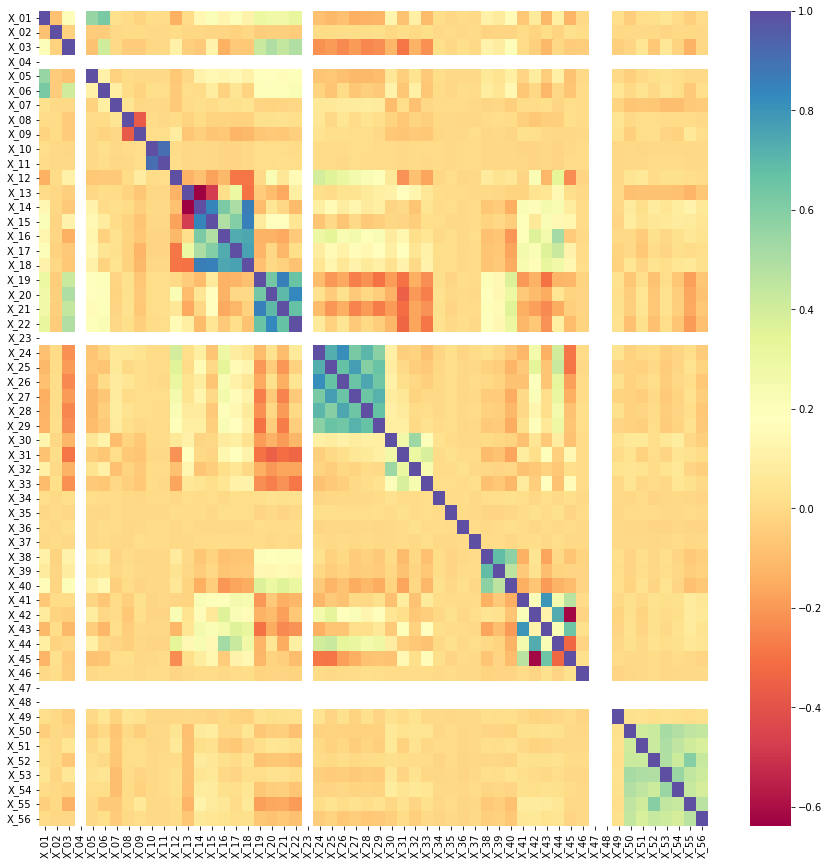

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(x_train_log.corr(), annot=False, cmap='Spectral')

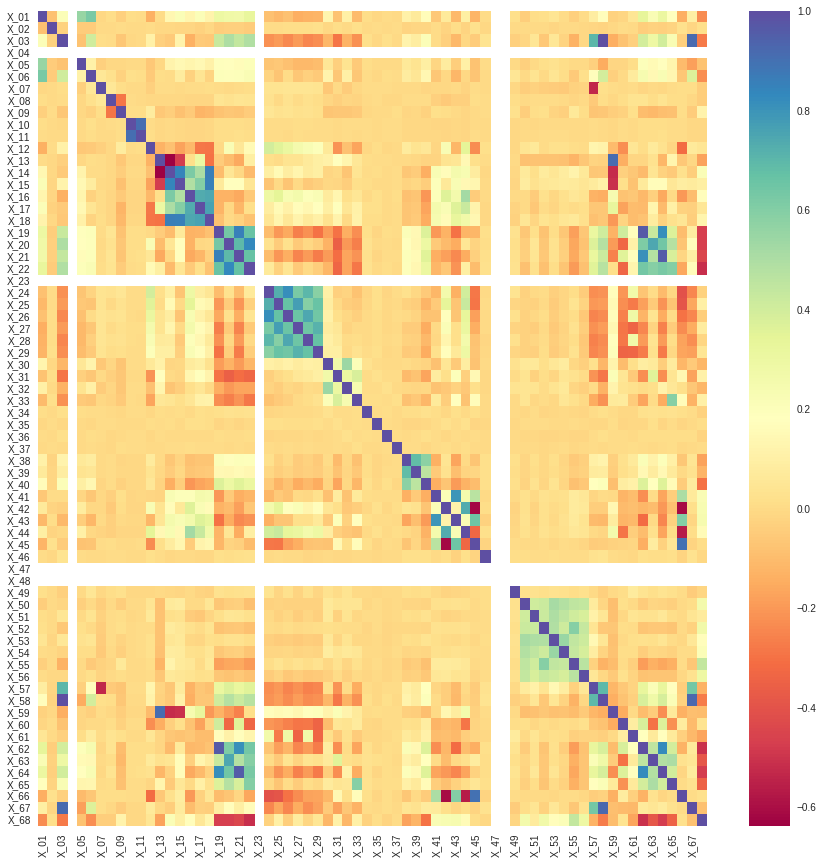

In [ ]:
# x data의 correlation heatmap
plt.figure(figsize = (15,15))
sns.heatmap(x_train_fe.corr(), annot=False, cmap='Spectral')

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(test.corr(), annot=False, cmap='coolwarm')

In [ ]:
sns.pairplot(
    data=train,
    x_vars = x_cand,
    y_vars = y_cand
)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

RANDOM_SEED = 42

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
x_train_s = pd.DataFrame(x_train_s, columns=x_train.columns)
x_test_s = pd.DataFrame(x_test_s, columns=x_train.columns)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train_fe)
x_train_fe_s = scaler.transform(x_train_fe)
x_test_fe_s = scaler.transform(x_test_fe)
x_train_fe_s = pd.DataFrame(x_train_fe_s, columns=x_train_fe.columns)
x_test_fe_s = pd.DataFrame(x_test_fe_s, columns=x_train_fe.columns)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train_fe_log)
x_train_fe_log_s = scaler.transform(x_train_fe_log)
x_test_fe_log_s = scaler.transform(x_test_fe_log)
x_train_fe_log_s = pd.DataFrame(x_train_fe_log_s, columns=x_train_fe.columns)
x_test_fe_log_s = pd.DataFrame(x_test_fe_log_s, columns=x_train_fe.columns)

In [ ]:
x_test_fe.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_57,X_58,X_59,X_60,X_61,X_106,X_200,X_201,X_202,X_203
0,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,...,2.512947,0.752648,-0.26,0.33,0.17,0.01632,4.65,4.85,4.51,4.92
1,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,...,2.474848,0.680151,-0.21,-0.02,0.33,0.01748,4.62,4.86,4.51,4.89
2,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,...,2.326138,0.676946,-0.17,0.15,0.07,0.02340,4.57,4.81,4.52,4.88
3,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,...,2.339964,0.646634,0.18,-0.08,0.14,0.02272,4.72,4.76,4.66,5.04
4,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,...,2.228275,0.654327,-0.19,-0.05,0.02,0.01012,4.65,4.93,4.50,4.87


In [ ]:
x_test_fe_log_s.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_57,X_58,X_59,X_60,X_61,X_106,X_200,X_201,X_202,X_203
0,0.034624,2.238952,1.522712,0.0,-0.857493,1.489425,0.155843,-1.444468,0.310208,-0.028394,...,0.506838,1.578763,-1.664148,5.372527,-0.013270,0.249603,0.282735,0.895639,-0.256386,0.706851
1,-0.349043,-0.446638,0.105540,0.0,-0.629534,-1.217905,-0.503321,-0.394370,-0.380174,-0.028394,...,0.365334,0.149206,-1.340804,0.307185,1.677392,0.461831,0.007137,0.990550,-0.256386,0.475360
2,0.418668,-0.446638,0.027887,0.0,-0.826490,2.843089,-0.068521,0.701855,-0.012070,-0.028394,...,-0.187004,0.086006,-1.082129,2.767494,-1.069934,1.544926,-0.452194,0.515995,-0.162125,0.398196
3,0.418668,-0.446638,-0.573926,0.0,-0.859316,1.489425,-0.470549,-0.620137,-0.510025,-0.028394,...,-0.135651,-0.511725,1.181281,-0.561160,-0.330269,1.420517,0.925799,0.041440,1.157536,1.632816
4,1.954465,2.238952,-0.418620,0.0,-0.813725,1.940794,0.002388,-1.262088,0.211448,-0.028394,...,-0.550486,-0.360030,-1.211466,-0.126988,-1.598266,-0.884719,0.282735,1.654927,-0.350648,0.321032


In [ ]:
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    gt = gt.to_numpy()
    all_nrmse = []
    for idx in range(14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:])
    return score

In [ ]:
# mlpr = MLPRegressor(hidden_layer_sizes=(100,50,20), activation='relu', batch_size=64)

In [ ]:
rmse_lst = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    mlpr.fit(tr_x, tr_y)
    pred = mlpr.predict(val_x)
    pred = pd.DataFrame(pred, columns=y_train.columns)
    # print(pred)
    # print(val_y)
    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)

print(sum(rmse_lst)/10)

In [ ]:
from lightgbm import LGBMRegressor
from lightgbm import plot_importance
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
#original
mor_lgbm_o = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train, y_train):
    tr_x, tr_y = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_o.fit(tr_x, tr_y)
    pred = mor_lgbm_o.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.9415496704973387]
[1.9415496704973387, 1.942961812915888]
[1.9415496704973387, 1.942961812915888, 1.993507425782333]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568, 1.9509362805727026]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568, 1.9509362805727026, 1.942741618190271]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568, 1.9509362805727026, 1.942741618190271, 1.9898045621921674]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568, 1.9509362805727026, 1.942741618190271, 1.9898045621921674, 1.9215736118637068]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568, 1.9509362805727026, 1.942741618190271, 1.9898045621921674, 1.9215736118637068, 1.983318353342683]
[1.9415496704973387, 1.942961812915888, 1.993507425782333, 1.9532257156800568, 1.9509362805727026, 1.9427416181

In [ ]:
#log
mor_lgbm_log = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_log, y_train):
    tr_x, tr_y = x_train_log.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_log.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_log.fit(tr_x, tr_y)
    pred = mor_lgbm_log.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.941544808215899]
[1.941544808215899, 1.9429625571036835]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903, 1.9509362805727026]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903, 1.9509362805727026, 1.942741618190271]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903, 1.9509362805727026, 1.942741618190271, 1.9898033232571986]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903, 1.9509362805727026, 1.942741618190271, 1.9898033232571986, 1.9215736105441321]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903, 1.9509362805727026, 1.942741618190271, 1.9898033232571986, 1.9215736105441321, 1.983318401791613]
[1.941544808215899, 1.9429625571036835, 1.9935051857957884, 1.9532249209797903, 1.9509362805727026, 1.942

In [ ]:
# scaler
mor_lgbm = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm.fit(tr_x, tr_y)
    pred = mor_lgbm.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))
#1.953413211604581

[1.9371547586234183]
[1.9371547586234183, 1.942074577149414]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559, 1.9510304872269826]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559, 1.9510304872269826, 1.9440539720782652]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559, 1.9510304872269826, 1.9440539720782652, 1.988246588030521]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559, 1.9510304872269826, 1.9440539720782652, 1.988246588030521, 1.9234685937953142]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559, 1.9510304872269826, 1.9440539720782652, 1.988246588030521, 1.9234685937953142, 1.9812467723346967]
[1.9371547586234183, 1.942074577149414, 1.9914647270156571, 1.9559008178636559, 1.9510304872269826, 1.

In [ ]:
# f.e

mor_lgbm_fe = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED, n_estimators=200))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_fe, y_train):
    tr_x, tr_y = x_train_fe.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_fe.fit(tr_x, tr_y)
    pred = mor_lgbm_fe.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.9364914298101725]
[1.9364914298101725, 1.9434038671725309]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842, 1.9610960716951646]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842, 1.9610960716951646, 1.945576386090003]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842, 1.9610960716951646, 1.945576386090003, 1.9966777203958497]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842, 1.9610960716951646, 1.945576386090003, 1.9966777203958497, 1.9250299833948146]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842, 1.9610960716951646, 1.945576386090003, 1.9966777203958497, 1.9250299833948146, 1.984999811400256]
[1.9364914298101725, 1.9434038671725309, 1.985044402273591, 1.9597343055933842, 1.9610960716951646, 1.9

In [ ]:
# f.e, scaler
mor_lgbm_fe_s = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_fe_s, y_train):
    tr_x, tr_y = x_train_fe_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_fe_s.fit(tr_x, tr_y)
    pred = mor_lgbm_fe_s.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.9375293943960672]
[1.9375293943960672, 1.9371680031040377]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116, 1.9563127569979368]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116, 1.9563127569979368, 1.943292234580182]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116, 1.9563127569979368, 1.943292234580182, 1.9918230572713451]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116, 1.9563127569979368, 1.943292234580182, 1.9918230572713451, 1.9233804702805688]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116, 1.9563127569979368, 1.943292234580182, 1.9918230572713451, 1.9233804702805688, 1.9808867280095661]
[1.9375293943960672, 1.9371680031040377, 1.986389763331163, 1.9539795971977116, 1.9563127569979368, 1.

In [ ]:
# f.e, log
mor_lgbm_fe_log = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_fe_log, y_train):
    tr_x, tr_y = x_train_fe_log.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe_log.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_fe_log.fit(tr_x, tr_y)
    pred = mor_lgbm_fe_log.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.9382546814534525]
[1.9382546814534525, 1.9423228673688953]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085, 1.9571261151573498]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085, 1.9571261151573498, 1.9442608405820754]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085, 1.9571261151573498, 1.9442608405820754, 1.9918021284028569]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085, 1.9571261151573498, 1.9442608405820754, 1.9918021284028569, 1.9193111335421669]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085, 1.9571261151573498, 1.9442608405820754, 1.9918021284028569, 1.9193111335421669, 1.982612092394528]
[1.9382546814534525, 1.9423228673688953, 1.985026242951848, 1.9554240205318085, 1.9571261151573498,

In [ ]:
# f.e, log, scaler
mor_lgbm_fe_log_s = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_fe_log_s, y_train):
    tr_x, tr_y = x_train_fe_log_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe_log_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_fe_log_s.fit(tr_x, tr_y)
    pred = mor_lgbm_fe_log_s.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.9384286695922157]
[1.9384286695922157, 1.9371513237608888]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569, 1.9533847486819012]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569, 1.9533847486819012, 1.946623335927425]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569, 1.9533847486819012, 1.946623335927425, 1.9914417968650064]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569, 1.9533847486819012, 1.946623335927425, 1.9914417968650064, 1.9216306093714177]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569, 1.9533847486819012, 1.946623335927425, 1.9914417968650064, 1.9216306093714177, 1.9810796243134488]
[1.9384286695922157, 1.9371513237608888, 1.987853180238291, 1.953842988412569, 1.9533847486819012, 1.9466233

In [ ]:
mor_lgbm_fe = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_fe_s, y_train):
    tr_x, tr_y = x_train_fe_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_fe.fit(tr_x, tr_y)
    pred = mor_lgbm_fe.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)
print(np.mean(rmse_lst))

#1.9468335164658641

In [ ]:
mor_lgbm_fe_log = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_fe_s, y_train):
    tr_x, tr_y = x_train_fe_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_lgbm_fe_log.fit(tr_x, tr_y)
    pred = mor_lgbm_fe_log.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)
print(np.mean(rmse_lst))

[1.9393742456750587]
[1.9393742456750587, 1.9376782023960746]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656, 1.979517381669492]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656, 1.979517381669492, 1.9748099180072336]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656, 1.979517381669492, 1.9748099180072336, 1.9295174566369644]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656, 1.979517381669492, 1.9748099180072336, 1.9295174566369644, 1.976033081518442]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656, 1.979517381669492, 1.9748099180072336, 1.9295174566369644, 1.976033081518442, 1.934520308379904]
[1.9393742456750587, 1.9376782023960746, 1.945737370699379, 1.9485434422745656, 1.979517381669492, 1.97480

In [ ]:
pred_a1 = mor_lgbm_fe_log.predict(x_test_fe_s)

In [ ]:
from xgboost import XGBRegressor

rmse_lst = []
mor_xgb = MultiOutputRegressor(XGBRegressor(random_state=555))
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_xgb.fit(tr_x, tr_y)
    pred = mor_xgb.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)
print(np.mean(rmse_lst))

[01:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance
rmse_lst = []
mor_xgb_fe = MultiOutputRegressor(XGBRegressor(random_state=555, n_estimators=200))
for tr_idx, val_idx in kf.split(x_train_fe, y_train):
    tr_x, tr_y = x_train_fe.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe.iloc[val_idx], y_train.iloc[val_idx]
    mor_xgb_fe.fit(tr_x, tr_y)
    pred = mor_xgb_fe.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))

    print(rmse_lst)
print(np.mean(rmse_lst))

[07:24:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor
mor_cat = MultiOutputRegressor(CatBoostRegressor(random_state=555, allow_writing_files=False))
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_cat.fit(tr_x, tr_y)
    pred = mor_cat.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)

print(np.mean(rmse_lst))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 0.8940205	total: 115ms	remaining: 16.4s
7:	learn: 0.8914528	total: 133ms	remaining: 16.5s
8:	learn: 0.8894469	total: 149ms	remaining: 16.4s
9:	learn: 0.8877900	total: 164ms	remaining: 16.2s
10:	learn: 0.8860303	total: 183ms	remaining: 16.5s
11:	learn: 0.8845451	total: 209ms	remaining: 17.2s
12:	learn: 0.8831895	total: 225ms	remaining: 17.1s
13:	learn: 0.8819634	total: 239ms	remaining: 16.8s
14:	learn: 0.8808773	total: 254ms	remaining: 16.6s
15:	learn: 0.8795055	total: 268ms	remaining: 16.5s
16:	learn: 0.8782954	total: 284ms	remaining: 16.4s
17:	learn: 0.8772622	total: 298ms	remaining: 16.3s
18:	learn: 0.8762589	total: 312ms	remaining: 16.1s
19:	learn: 0.8755115	total: 327ms	remaining: 16s
20:	learn: 0.8745350	total: 342ms	remaining: 16s
21:	learn: 0.8738162	total: 357ms	remaining: 15.9s
22:	learn: 0.8731826	total: 372ms	remaining: 15.8s
23:	learn: 0.8724694	total: 388ms	remaining: 15.8s
24:	learn: 0.8718932	total: 402ms	remaining: 15.7s
25:

In [ ]:
from catboost import CatBoostRegressor
mor_cat_fe = MultiOutputRegressor(CatBoostRegressor(random_state=555, n_estimators=200))
for tr_idx, val_idx in kf.split(x_train_fe, y_train):
    tr_x, tr_y = x_train_fe.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_fe.iloc[val_idx], y_train.iloc[val_idx]
    mor_cat_fe.fit(tr_x, tr_y)
    pred = mor_cat_fe.predict(val_x)
    rmse_lst.append(lg_nrmse(val_y, pred))
    print(rmse_lst)

print(np.mean(rmse_lst))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
27:	learn: 2.5650094	total: 545ms	remaining: 3.35s
28:	learn: 2.5613099	total: 562ms	remaining: 3.31s
29:	learn: 2.5600635	total: 579ms	remaining: 3.28s
30:	learn: 2.5569918	total: 599ms	remaining: 3.26s
31:	learn: 2.5558517	total: 613ms	remaining: 3.22s
32:	learn: 2.5536982	total: 638ms	remaining: 3.23s
33:	learn: 2.5522755	total: 656ms	remaining: 3.2s
34:	learn: 2.5504083	total: 678ms	remaining: 3.2s
35:	learn: 2.5477613	total: 692ms	remaining: 3.15s
36:	learn: 2.5433631	total: 711ms	remaining: 3.13s
37:	learn: 2.5415038	total: 727ms	remaining: 3.1s
38:	learn: 2.5383678	total: 746ms	remaining: 3.08s
39:	learn: 2.5366914	total: 762ms	remaining: 3.05s
40:	learn: 2.5345209	total: 782ms	remaining: 3.03s
41:	learn: 2.5321919	total: 803ms	remaining: 3.02s
42:	learn: 2.5293777	total: 820ms	remaining: 3s
43:	learn: 2.5272192	total: 851ms	remaining: 3.02s
44:	learn: 2.5251917	total: 870ms	remaining: 3s
45:	learn: 2.5222382	total: 890ms	remaining: 2.98s
46:	

## -----------------------여기 위까지가 ensemble 학습(lgbm, xgboost, catboost)

In [ ]:
from sklearn.model_selection import train_test_split

# x_train_fe_final, x_val_fe_final, y_train_final, y_val_final = train_test_split(x_train_fe_s, y_train, test_size=0.2, shuffle=True, random_state=444)

In [ ]:
lgbm_pred_fe = mor_lgbm_fe.predict(x_train_fe)
xgb_pred_fe = mor_xgb_fe.predict(x_train_fe)
cat_pred_fe = mor_cat_fe.predict(x_train_fe)

In [ ]:
res_lgbm = lg_nrmse(y_train, lgbm_pred_fe)
res_xgb = lg_nrmse(y_train, xgb_pred_fe)
res_cat = lg_nrmse(y_train, cat_pred_fe)

In [ ]:
print(res_lgbm)
print(res_xgb)
print(res_cat)

1.6798167366915393
1.8993353037318164
1.7471131481875017


In [ ]:
pred_comb = np.concatenate((lgbm_pred_fe, xgb_pred_fe, cat_pred_fe), axis=1)
pred_comb = pd.DataFrame(pred_comb)
pred_comb.shape

(39607, 42)

In [ ]:
stack_lgbm = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM_SEED))
rmse_lst = []
for tr_idx, val_idx in kf.split(pred_comb, y_train):
    tr_x, tr_y = pred_comb.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = pred_comb.iloc[val_idx], y_train.iloc[val_idx]
    stack_lgbm.fit(tr_x, tr_y)
    pred = stack_lgbm.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)
print(np.mean(rmse_lst))


[1.2383236174424213]
[1.2383236174424213, 1.230624338171913]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573, 1.254672922740124]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573, 1.254672922740124, 1.2301514942602287]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573, 1.254672922740124, 1.2301514942602287, 1.2635350674706811]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573, 1.254672922740124, 1.2301514942602287, 1.2635350674706811, 1.2339625290713228]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573, 1.254672922740124, 1.2301514942602287, 1.2635350674706811, 1.2339625290713228, 1.2566132878459777]
[1.2383236174424213, 1.230624338171913, 1.2649486703110744, 1.2561784962303573, 1.254672922740124, 1.230

In [ ]:
pred_total = stack_lgbm.predict(pred_comb)
loss_p = lg_nrmse(y_train, pred_total)
print(loss_p)

1.2561595734944881


In [ ]:
lgbm_pred_fe_test = mor_lgbm_fe.predict(x_test_fe)
xgb_pred_fe_test = mor_xgb_fe.predict(x_test_fe)
cat_pred_fe_test = mor_cat_fe.predict(x_test_fe)
pred_comb_test = np.concatenate((lgbm_pred_fe_test, xgb_pred_fe_test, cat_pred_fe_test), axis=1)
pred_comb_test = pd.DataFrame(pred_comb_test)
pred_final = stack_lgbm.predict(pred_comb_test)
print(pred_final[:3])

[[  1.92461231   1.76863265   1.53835754  15.06598129  31.06135526
   17.34681692   3.11820853 -25.93775429 -25.99008964 -21.7967267
   24.89963428 -25.79482735 -25.72727166 -26.01774597]
 [  1.66430477   1.52380112   1.3841191   13.13773448  30.72331394
   16.77603173   3.26110374 -26.12914905 -25.99671631 -22.17960044
   24.40152137 -25.92418052 -25.96093838 -25.96941838]
 [  1.63539336   1.00544612   1.07589765  15.69165104  32.92956451
   16.49611759   3.15111911 -26.55756844 -26.64214209 -22.51081656
   24.07174239 -26.44443329 -26.62122378 -26.66205417]]


In [ ]:
L = 1/res_lgbm
X = 1/res_xgb
C = 1/res_cat
S = 1/loss_p

lgbm_w = L /(L+X+C+S)
xgb_w = X /(L+X+C+S)
cat_w = C / (L+X+C+S)
stack_w = S/(L+X+C+S)

pred_blend = np.array((lgbm_pred_fe*lgbm_w)+(xgb_pred_fe*xgb_w)+(cat_pred_fe*cat_w)+(pred_total*stack_w))
pred_blend_test = np.array((lgbm_pred_fe_test*lgbm_w)+(xgb_pred_fe_test*xgb_w)+(cat_pred_fe_test*cat_w)+(pred_final*stack_w))

print(lg_nrmse(y_train, pred_blend))

1.5167563241384459


In [ ]:
print(pred_blend[:3])

[[  1.92273834   1.34996817   1.54579605  12.73666019  29.9388894
   16.68697495   3.74900994 -25.62557254 -25.59868874 -22.30352316
   24.1266241  -25.53617255 -25.50631427 -25.5705864 ]
 [  1.47269469   1.12234175   1.15020956  16.20656573  32.03608321
   16.92769499   3.25861184 -26.24205374 -26.08389153 -22.259217
   24.69517661 -26.04607551 -26.06958612 -26.04088631]
 [  1.46094365   1.02651802   0.9920569   15.89286258  31.99790518
   17.11575365   3.06521329 -25.72394925 -25.73116549 -22.05061354
   24.90993199 -25.66296049 -25.61206041 -25.78036652]]


In [ ]:
print(pred_[:3])

[[  1.92461231   1.76863265   1.53835754  15.06598129  31.06135526
   17.34681692   3.11820853 -25.93775429 -25.99008964 -21.7967267
   24.89963428 -25.79482735 -25.72727166 -26.01774597]
 [  1.66430477   1.52380112   1.3841191   13.13773448  30.72331394
   16.77603173   3.26110374 -26.12914905 -25.99671631 -22.17960044
   24.40152137 -25.92418052 -25.96093838 -25.96941838]
 [  1.63539336   1.00544612   1.07589765  15.69165104  32.92956451
   16.49611759   3.15111911 -26.55756844 -26.64214209 -22.51081656
   24.07174239 -26.44443329 -26.62122378 -26.66205417]]


In [ ]:
print(pred_blend_test[:3])

[[  1.6399963    1.55063122   1.28322339  14.49544893  31.53450244
   16.95579709   3.11999207 -26.01241097 -26.0989263  -22.02242705
   24.83965622 -25.92114596 -25.85081401 -26.07235289]
 [  1.56655213   1.36642226   1.23605779  13.42182136  30.8354329
   16.66272033   3.20077495 -26.17781402 -26.1069373  -22.22868095
   24.36940767 -26.04566812 -26.02531653 -26.02310806]
 [  1.54376273   1.04727733   1.10694455  15.25863061  32.57183576
   16.59301959   3.06338489 -26.17752306 -26.12526328 -22.11434512
   24.55746639 -26.04860856 -26.14150183 -26.2102217 ]]


In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 25.5 MB/s 
     |████████████████████████████████| 2.0 MB 54.3 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
from flaml import AutoML

In [ ]:
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(x_train_fe_log_s, y_train, test_size=0.2, random_state=44)

In [ ]:
X_train_auto.shape, X_test_auto.shape

((31685, 66), (7922, 66))

In [ ]:
y_train_auto.shape, y_test_auto.shape

((31685, 14), (7922, 14))

In [ ]:
model = MultiOutputRegressor(AutoML(task='regression',estimator_list =["lgbm"],metric='rmse', time_budget=60, eval_method='cv', n_splits=5))
model.fit(X_train_auto, y_train_auto)

pred_final = model.predict(X_test_auto)

# print(pred_final)
auto_val_loss = lg_nrmse(y_test_auto, pred_final)

print(auto_val_loss) #1.4450004091487283




[flaml.automl: 08-05 06:49:06] {2444} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 08-05 06:49:06] {2446} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 08-05 06:49:06] {2449} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 08-05 06:49:06] {2568} INFO - Minimizing error metric: rmse
INFO:flaml.automl:Minimizing error metric: rmse
[flaml.automl: 08-05 06:49:06] {2708} INFO - List of ML learners in AutoML Run: ['lgbm']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 08-05 06:49:06] {3010} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 08-05 06:49:07] {3144} INFO - Estimated sufficient time budget=13977s. Estimated necessary time budget=14s.
INFO:flaml.automl:Estimated sufficient time budget=13977s. Estimated necessary time budget=14s.
[flaml.automl: 08-05 06:49:07] {3196} INFO -  at 1.9s

1.9515292122805927


In [ ]:
pred_final = model.predict(X_train_auto)

# print(pred_final)
auto_val_loss = lg_nrmse(y_train_auto, pred_final)

print(auto_val_loss) #1.4450004091487283

1.8578078081790477


In [ ]:
pred1 = mor_lgbm_fe_log_s.predict(x_train_fe_log_s)
loss1 = lg_nrmse(y_train, pred1)
print(loss1)

pred2 = mor_lgbm_fe_log.predict(x_train_fe_log)
loss2 = lg_nrmse(y_train, pred2)
print(loss2)

pred3 = mor_lgbm_fe.predict(x_train_fe)
loss3 = lg_nrmse(y_train, pred3)
print(loss3)




1.7846885891223032
1.7839781928767098
1.7839781928767098


In [ ]:
pred4 = mor_lgbm_o.predict(x_train)
loss4 = lg_nrmse(y_train, pred4)
print(loss4)

pred5 = mor_lgbm_fe_s.predict(x_train_fe_s)
loss5 = lg_nrmse(y_train, pred5)
print(loss5)

pred6 = mor_lgbm.predict(x_train_s)
loss6 = lg_nrmse(y_train, pred6)
print(loss6)

1.7902262490569485
1.7852930636711024
1.788867727204165


In [ ]:
pred_stack = model.predict(pred_comb)
res_stack = lg_nrmse(y_train, pred_stack)

print(res_stack)

1.2894569159825269


In [ ]:
print(res_lgbm)
print(res_xgb)
print(res_cat)
print(res_stack)

1.7852991441597843
1.9289313465632685
1.6831200089452447
1.2894569159825269


In [ ]:
L = 1/res_lgbm
X = 1/res_xgb
C = 1/res_cat
S = 1/res_stack

lgbm_w = L /(L+X+C+S)
xgb_w = X /(L+X+C+S)
cat_w = C / (L+X+C+S)
stack_w = S/(L+X+C+S)





# 

In [ ]:
print(lgbm_pred_fe[:3])
print(xgb_pred_fe[:3])
print(cat_pred_fe[:3])
print(pred_stack[:3])

[[  1.66324643   1.21815502   1.31157054  14.72766472  31.72673376
   16.94848221   3.34538364 -25.54868052 -25.59237754 -21.78337169
   24.95965987 -25.3993521  -25.43013511 -25.33250039]
 [  1.46051079   1.10825682   1.13655554  15.5372937   31.93858053
   17.05398489   3.16126514 -25.96713336 -25.97702123 -22.08963178
   24.88973733 -25.69304131 -25.97027005 -25.92819047]
 [  1.38545665   1.02698146   0.97798319  15.50194357  31.52377831
   16.88813324   3.11397526 -25.59406415 -25.6243685  -22.08035508
   24.6016598  -25.52461888 -25.58791394 -25.59393474]]
[[  1.5112735   1.1244717   1.1159935  14.667286   32.019936   16.546574
    3.0812724 -25.69619   -25.680805  -21.926458   24.976282  -25.71475
  -25.649033  -25.550402 ]
 [  1.5121369   1.1470387   1.1049738  15.251844   32.22837    16.87616
    3.1379333 -25.9069    -25.866762  -22.01399    24.740664  -25.754196
  -25.702705  -25.7121   ]
 [  1.3355489   0.9756193   1.0019358  15.022973   31.474155   16.69538
    3.1310732 -2

In [ ]:
pred_blend = np.array((lgbm_pred_fe*lgbm_w)+(xgb_pred_fe*xgb_w)+(cat_pred_fe*cat_w)+(pred_stack*stack_w))

res_final = lg_nrmse(y_train, pred_blend)

print(res_final)

1.5600551076563167


In [ ]:
lgbm_pred_fe_test = mor_lgbm_fe.predict(x_test_fe_s)
xgb_pred_fe_test = mor_xgb_fe.predict(x_test_fe_s)
cat_pred_fe_test = mor_cat_fe.predict(x_test_fe_s)

pred_comb_auto = np.concatenate((lgbm_pred_fe_test, xgb_pred_fe_test, cat_pred_fe_test), axis=1)
pred_comb_auto = pd.DataFrame(pred_comb_auto)

pred_auto_final = model.predict(pred_comb_auto)

print(lgbm_pred_fe_test[:3])
print(xgb_pred_fe_test[:3])
print(cat_pred_fe_test[:3])
print(pred_auto_final[:3])

In [ ]:
pred_blend_new2 = np.array((lgbm_pred_fe_test+xgb_pred_fe_test+cat_pred_fe_test)/3)

In [ ]:
print(pred_blend_new2[:10])

[[  1.50319081   1.44790552   1.16134438  14.20915529  31.76240078
   16.77958298   3.1201704  -26.04916656 -26.14929843 -22.1330966
   24.81324396 -25.98652311 -25.91264833 -26.09970849]
 [  1.51999721   1.29065315   1.16627477  13.56497962  30.89279401
   16.60613624   3.17120013 -26.19894995 -26.15973298 -22.25086239
   24.35432843 -26.10391221 -26.05529816 -26.04968919]
 [  1.499142     1.0675385    1.12256612  15.03504214  32.39783215
   16.64790333   3.02136445 -25.99626531 -25.87650571 -21.92571403
   24.78902473 -25.8563892  -25.90780156 -25.99198271]
 [  1.44431074   1.18107191   1.01425381  15.18305536  32.88004959
   17.14772726   2.99459888 -25.55460149 -25.64401382 -21.66140166
   24.9189503  -25.57259094 -25.49211623 -25.47094625]
 [  1.36007636   1.07087015   1.02420545  15.03330875  31.89104656
   16.71664166   3.1624245  -25.76735459 -25.71507405 -22.01776028
   24.83551499 -25.76048976 -25.69017763 -25.59441252]
 [  1.35419766   1.02037374   0.96066726  14.88750002  3

In [ ]:
pred_blend_test = np.array((lgbm_pred_fe_test*lgbm_w)+(xgb_pred_fe_test*xgb_w)+(cat_pred_fe_test*cat_w)+(pred_auto_final*stack_w))

In [ ]:
lgbm_pred_fe_test = mor_lgbm_fe.predict(x_test_fe_s)
xgb_pred_fe_test = mor_xgb_fe.predict(x_test_fe_s)
cat_pred_fe_test = mor_cat_fe.predict(x_test_fe_s)

pred_comb_auto = np.concatenate((lgbm_pred_fe_test, xgb_pred_fe_test, cat_pred_fe_test), axis=1)
pred_comb_auto = pd.DataFrame(pred_comb_auto)

pred_auto_final = model.predict(pred_comb_auto)

In [ ]:
print(lgbm_pred_fe_test[:3])
print(xgb_pred_fe_test[:3])
print(cat_pred_fe_test[:3])

print(pred_comb_auto.iloc[0])

In [ ]:
pip install pycaret

In [ ]:
import pycaret
pycaret.__version__

'2.3.10'

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
import jinja2
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
29681,1.340462,1.031894,0.910262,14.639870,31.859752,16.889814,2.990844,-25.893290,-26.073763,-22.094268,...,32.552200,16.899181,2.942181,-25.874298,-25.897555,-21.752131,24.781470,-25.829725,-25.747400,-25.850563
37211,1.477098,1.139765,1.074051,14.062154,31.984981,16.590623,3.107337,-26.168166,-26.162099,-22.166642,...,30.475148,16.335600,3.532340,-26.501563,-26.533435,-22.410816,23.890802,-26.385579,-26.357236,-26.411292
13478,1.449264,1.190460,1.094747,14.301705,31.626711,16.159039,3.032703,-26.130955,-26.163256,-22.248760,...,31.240240,16.655788,3.132765,-26.224575,-26.255390,-22.307526,24.376793,-26.174938,-26.154104,-26.185228
19756,1.407788,1.109246,1.050974,13.496187,31.208355,16.540590,3.214619,-26.398829,-26.401026,-22.340544,...,30.936560,16.570221,3.254938,-26.493853,-26.519730,-22.475300,24.162073,-26.435959,-26.429865,-26.445068
13853,1.348469,1.064480,1.025213,13.667615,31.448032,16.570295,3.118984,-26.277641,-26.293921,-22.215652,...,31.323513,16.587164,3.137735,-26.264902,-26.305799,-22.230968,24.261789,-26.218445,-26.228596,-26.259325


In [ ]:
from sklearn.linear_model import LinearRegression

mor_lr_stack = MultiOutputRegressor(LinearRegression())
rmse_lst = []
for tr_idx, val_idx in kf.split(pred_comb, y_train):
    tr_x, tr_y = pred_comb.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = pred_comb.iloc[val_idx], y_train.iloc[val_idx]
    mor_lr_stack.fit(tr_x, tr_y)
    pred = mor_lr_stack.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)

[1.3536857174313661]
[1.3536857174313661, 1.3768454975250142]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469, 1.3394039677529495]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469, 1.3394039677529495, 1.3317847568341854]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469, 1.3394039677529495, 1.3317847568341854, 1.3535802191806663]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469, 1.3394039677529495, 1.3317847568341854, 1.3535802191806663, 1.348501441503145]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469, 1.3394039677529495, 1.3317847568341854, 1.3535802191806663, 1.348501441503145, 1.3791052596014077]
[1.3536857174313661, 1.3768454975250142, 1.3346165334052005, 1.332124505880469, 1.3394039677529495,

In [ ]:
final = mor_lr_stack.predict(pred_comb_auto)

In [ ]:
final[:4]

NameError: ignored

In [ ]:
res_lgbm = lg_nrmse(y_train, lgbm_pred_fe)
res_xgb = lg_nrmse(y_train, xgb_pred_fe)
res_cat = lg_nrmse(y_train, cat_pred_fe)
res = lg_nrmse(y_train, final)

print(res_lgbm)
print(res_xgb)
print(res_cat)
print(res)

1.788972673883183
1.9287409962734763
1.688208195059401
2.015398326202878


In [ ]:
res_lgbm = lg_nrmse(y_train, lgbm_pred_fe)
res_xgb = lg_nrmse(y_train, xgb_pred_fe)
res_cat = lg_nrmse(y_train, cat_pred_fe)
res = lg_nrmse(y_train, final)


L, X, C = 1/res_lgbm, 1/res_xgb, 1/res_cat
lgbm_w = L /(L+X+C)
xgb_w = X /(L+X+C)
cat_w = C / (L+X+C)

pred_w = np.array((lgbm_pred_fe*lgbm_w)+(xgb_pred_fe*xgb_w)+(cat_pred_fe*cat_w))


In [ ]:
res_w = lg_nrmse(y_train, pred_w)
print(res_w)

1.7856630016953898


In [ ]:
lgbm_pred = mor_lgbm.predict(x_train_s)
xgb_pred = mor_xgb.predict(x_train_s)
cat_pred = mor_cat.predict(x_train_s)




lgbm_pred.shape, xgb_pred.shape, cat_pred.shape

((39607, 14), (39607, 14), (39607, 14))

In [ ]:
pred = np.array([lgbm_pred,xgb_pred,cat_pred])
pred = pred.reshape(39607, -1)

# pred = np.transpose(pred)

mor_mlp_stack = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', batch_size=64))

# pred.shape, y_train.shape
mor_mlp_stack.fit(pred, y_train)
final = mor_mlp_stack.predict(pred)

res_lgbm = lg_nrmse(y_train, lgbm_pred)
res_xgb = lg_nrmse(y_train, xgb_pred)
res_cat = lg_nrmse(y_train, cat_pred)
res = lg_nrmse(y_train, final)

print(res_lgbm)
print(res_xgb)
print(res_cat)
print(res)

44.9368137363413
49.526224620954025
42.12377758941081
53.45979865453438


In [ ]:
pred_mean = np.array((lgbm_pred*1.1+xgb_pred+cat_pred*1.3)/3.4)

res_mean = lg_nrmse(y_train, pred_mean)
print(res_mean)

44.81598429987463


In [ ]:
print(pred[:4])

[[  1.68324265   1.24741409   1.34263667  14.27732868  32.08811497
   17.13403075   3.23407177 -25.46711953 -25.56882659 -21.83606693
   24.42971394 -25.41875767 -25.35397089 -25.42207693   1.47065801
    1.09760791   1.08215877  15.48051686  31.90055235  17.05903727
    3.17744565 -25.84247994 -25.95129684 -21.99056961  24.7192467
  -25.79129986 -26.00394658 -25.85680806   1.38230107   1.01765832
    0.98633059  15.16747048  31.71407335  16.87105655   3.18747034
  -25.74488025 -25.83321745 -22.13164988  24.6208175  -25.64100884
  -25.7437459  -25.73084115]
 [  1.49300314   1.09542911   1.08571434  15.22181665  32.5962051
   16.87348914   3.04510995 -25.82514259 -25.78473169 -21.83157318
   24.63441553 -25.76086826 -25.68208074 -25.64077972   1.27425821
    0.92638869   0.92053644  15.23051991  32.29460883  16.85673444
    3.15250024 -25.57917052 -25.62992207 -21.64341033  25.06162106
  -25.53653035 -25.49886379 -25.5464123    1.35484379   1.02537536
    0.86989042  14.98851008  31.428

In [ ]:
final.shape

(39607, 14)

In [ ]:
mor_tune = MultiOutputRegressor(LGBMRegressor(random_state=555, n_estimators=50, learning_rate=0.01))

rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_tune.fit(tr_x, tr_y)
    pred = mor_tune.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)

# fig, ax = plt.subplots(figsize=(10, 12))
# plot_importance(lgbm, ax=ax)
print(np.mean(rmse_lst))

[51.41146514271155]
[51.41146514271155, 51.75595166523125]
[51.41146514271155, 51.75595166523125, 49.50957344410904]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516, 52.28934184053183]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516, 52.28934184053183, 49.4362427668482]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516, 52.28934184053183, 49.4362427668482, 50.49103115676097]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516, 52.28934184053183, 49.4362427668482, 50.49103115676097, 52.305595538389866]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516, 52.28934184053183, 49.4362427668482, 50.49103115676097, 52.305595538389866, 52.61295356642094]
[51.41146514271155, 51.75595166523125, 49.50957344410904, 49.725119973529516, 52.28934184053183, 49.4362427668482, 50.49103115676097

In [ ]:
print(np.mean(rmse_lst))

51.19898325724195


## Y_01 ~ Y_14 각각을 lightgbm으로 돌려보고 feature_importance 값 추출하기

In [ ]:
import shap
import skimage

In [ ]:
print(x_train.columns)

Index(['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27',
       'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36',
       'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45',
       'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54',
       'X_55', 'X_56'],
      dtype='object')


In [ ]:
feature_importance_lgbm_dict = {}
feature_importance_lgbm_shap_dict = {}

for i in range(14):
    y_train_temp = y_train[y_train.columns[i]]

    lgbm = LGBMRegressor(random_state=513)
    rmse_lst = []
    for tr_idx, val_idx in kf.split(x_train_fe_s, y_train_temp):
        tr_x, tr_y = x_train_fe_s.iloc[tr_idx], y_train_temp.iloc[tr_idx]
        val_x, val_y = x_train_fe_s.iloc[val_idx], y_train_temp.iloc[val_idx]
        lgbm.fit(tr_x, tr_y)
        pred = lgbm.predict(val_x)
        rmse = np.sqrt(mean_squared_error(val_y, pred))
        rmse_lst.append(rmse)
    
    print('RMSE of {} : {}'.format(str(y_train.columns[i]), np.mean(rmse_lst)))

    feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x_train.columns), reverse=True), columns=['Value','Feature'])
    # print(feature_imp)
    feature_importance_lgbm_dict[str(y_train.columns[i])] = feature_imp

    # plt.figure(figsize=(20, 10))
    # sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    # plt.title('LightGBM Features {}'.format(str(y_train.columns[i])))
    # plt.show()

    explainer = shap.TreeExplainer(lgbm)
    shap_values = explainer.shap_values(x_test_s)
    # print(shap_values.shape)

    # vals = np.abs(shap_values).mean(0)
    # feature_names = x_train.columns
    # feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
    #                                 columns=['col_name','feature_importance_vals'])
    # feature_importance.sort_values(by=['feature_importance_vals'],
    #                             ascending=False, inplace=True)
    # feature_importance_lgbm_shap_dict[str(y_train.columns[i])] = feature_importance
    # print(feature_importance)

    shap.summary_plot(shap_values, x_train_fe_s)
    shap.summary_plot(shap_values, x_train_fe_s, plot_type = 'bar')

    

In [ ]:
feature_rank = []
for k, v in feature_importance_lgbm_shap_dict.items():
    temp = []
    for i in range(v.shape[0]):
        temp.append(v.iloc[i, 0])
    feature_rank.append(temp)
for e in feature_rank:
    print(e)

In [ ]:
!pip install shap
!pip install --upgrade scikit_image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 35.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.5 MB 1.4 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


In [ ]:
import shap

ImportError: ignored

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance
rmse_lst = []
mor_xgb = MultiOutputRegressor(XGBRegressor())
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    mor_xgb.fit(tr_x, tr_y)
    pred = mor_xgb.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)

print(np.mean(rmse_lst))

In [ ]:
pred_test = mor.predict(x_test_s)

In [ ]:
# test data set predict


lgbm_pred_fe_test = mor_lgbm_fe.predict(x_test_fe_s)
xgb_pred_fe_test = mor_xgb_fe.predict(x_test_fe_s)
cat_pred_fe_test = mor_cat_fe.predict(x_test_fe_s)



pred = np.array(lgbm_pred_fe_test*lgbm_w+xgb_pred_fe_test*xgb_w+cat_pred_fe_test*cat_w)



In [ ]:
pred_mean = np.array((lgbm_pred_test*1.1+xgb_pred_test+cat_pred_test*1.3)/3.4)
pred_mean.shape

(39608, 14)

In [ ]:
print(model)

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, early_stop=False,
                                      ensemble=False, estimator_list='auto',
                                      eval_method='auto',
                                      fit_kwargs_by_estimator={},
                                      hpo_method='auto',
                                      keep_search_state=False,
                                      learner_selector='sample',
                                      log_file_name='',
                                      log_training_metric=False,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='auto',
                                      metric_constraints=[],
                                      min_sample_size=10000,
                                      model_history=False,
                    

In [ ]:
lgbm_pred_fe_test = mor_lgbm_fe.predict(x_test_fe_s)
xgb_pred_fe_test = mor_xgb_fe.predict(x_test_fe_s)
cat_pred_fe_test = mor_cat_fe.predict(x_test_fe_s)



pred_comb_auto = np.array([lgbm_pred_fe_test, xgb_pred_fe_test, cat_pred_fe_test])
pred_comb_auto = pred_comb_auto.reshape(x_test.shape[0], -1)
pred_comb_auto = pd.DataFrame(pred_comb_auto)

# pred_comb_auto.head()

pred_final_auto = model.predict(pred_comb_auto)

In [ ]:
pred_weighted = np.array((lgbm_pred_fe_test*1.0+xgb_pred_fe_test*0.5+cat_pred_fe_test*2.5)/4)

In [ ]:
for idx, col in enumerate(submission.columns):
    if col=='ID':
        continue
    submission[col] = pred_blend_new2[:,idx-1]

In [ ]:
submission.head(5)

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,1.503191,1.447906,1.161344,14.209155,31.762401,16.779583,3.120170,-26.049167,-26.149298,-22.133097,24.813244,-25.986523,-25.912648,-26.099708
1,TEST_00002,1.519997,1.290653,1.166275,13.564980,30.892794,16.606136,3.171200,-26.198950,-26.159733,-22.250862,24.354328,-26.103912,-26.055298,-26.049689
2,TEST_00003,1.499142,1.067538,1.122566,15.035042,32.397832,16.647903,3.021364,-25.996265,-25.876506,-21.925714,24.789025,-25.856389,-25.907802,-25.991983
3,TEST_00004,1.444311,1.181072,1.014254,15.183055,32.880050,17.147727,2.994599,-25.554601,-25.644014,-21.661402,24.918950,-25.572591,-25.492116,-25.470946
4,TEST_00005,1.360076,1.070870,1.024205,15.033309,31.891047,16.716642,3.162424,-25.767355,-25.715074,-22.017760,24.835515,-25.760490,-25.690178,-25.594413


In [ ]:
submission.to_csv('sub_11111.csv', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression
import random
import os

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [ ]:
LR = MultiOutputRegressor(LinearRegression())

In [ ]:
rmse_lst = []
for tr_idx, val_idx in kf.split(x_train_s, y_train):
    tr_x, tr_y = x_train_s.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = x_train_s.iloc[val_idx], y_train.iloc[val_idx]
    LR.fit(tr_x, tr_y)
    pred = LR.predict(val_x)

    rmse_lst.append(lg_nrmse(val_y, pred))
    # rmse = np.sqrt(mean_squared_error(np.expm1(val_y),np.expm1(pred)))
    # rmse_lst.append(rmse)
    # gb_pred += (sub_pred/10)
    print(rmse_lst)

print(np.mean(rmse_lst))

[51.57027355679362]
[51.57027355679362, 52.244392093461265]
[51.57027355679362, 52.244392093461265, 49.402143884077944]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684, 52.385955384211826]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684, 52.385955384211826, 49.49994607785666]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684, 52.385955384211826, 49.49994607785666, 50.667378978195465]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684, 52.385955384211826, 49.49994607785666, 50.667378978195465, 52.3523968221715]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684, 52.385955384211826, 49.49994607785666, 50.667378978195465, 52.3523968221715, 52.66597575932771]
[51.57027355679362, 52.244392093461265, 49.402143884077944, 50.12045834520684, 52.385955384211826, 49.4999460778566

In [ ]:
LR.fit(x_train_s, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
LR_pred_test = LR.predict(x_test_s)

In [ ]:
for idx, col in enumerate(submission.columns):
    if col=='ID':
        continue
    submission[col] = LR_pred_test[:,idx-1]
submission.to_csv('submission_LR.csv', index=False)

In [ ]:
submission.head(10)

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
1,TEST_00002,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
2,TEST_00003,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
3,TEST_00004,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
4,TEST_00005,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
5,TEST_00006,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
6,TEST_00007,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
7,TEST_00008,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
8,TEST_00009,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10
9,TEST_00010,-2.067114e+11,-2.078829e+11,-1.613333e+11,1.469508e+12,5.624767e+11,1.646793e+11,-1.078728e+10,-4.421225e+10,1.590934e+11,1.160767e+11,2.300721e+11,6.548701e+10,1.591305e+11,-2.408865e+10


## PyCarat

## AutoML


1. feature engineering으로 뽑은 데이터를 활용하여 각 output별 importance 확인(by SHAP)

2. 기본 train data set에서 importance가 높은 순서대로 rank를 주어 가중치 부여

3. SHAP에서 나온 importance를 기반으로 X-Y 상관관계 분석

4. xgboost, catboost에 대해서도 SHAP 수행하여 importance 확인

5. train data correlation 기반으로 X-Y 상관관계 분석